In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

In [2]:
def log_return(ticker,start,end):
    df = web.DataReader(ticker,'yahoo',start,end)
    df[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    return df[ticker]

In [3]:
def portfolio_logr(tickers,start,end):
    portfolio = pd.concat([log_return(ticker,start,end)for ticker in tickers],axis=1)
    return portfolio

In [4]:
tickers = ['NVDA','AMZN','GOOGL','GILD','CSCO','BIDU','ADSK','BIIB','INTC']

In [5]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2019,11,16)

In [6]:
returns = portfolio_logr(tickers,start,end)

In [7]:
returns.tail()

,NVDA,AMZN,GOOGL,GILD,CSCO,BIDU,ADSK,BIIB,INTC
Date,,,,,,,,,
2019-11-11,0.001923,-0.008000,-0.008223,-0.011383,-0.015063,-0.030072,-0.000262,0.003030,0.001372
2019-11-12,0.006846,0.003578,-0.000825,-0.004963,0.005598,0.007665,0.033060,-0.009359,-0.002574
2019-11-13,-0.004974,-0.014098,-0.000794,-0.015511,0.001859,-0.029241,0.007249,-0.033180,-0.005341
2019-11-14,0.005832,0.000850,0.009957,0.007551,-0.076078,-0.000761,-0.006743,-0.024201,-0.001383
2019-11-15,-0.027056,-0.008649,0.018459,0.019554,0.004000,-0.009777,0.022571,0.025548,0.002591


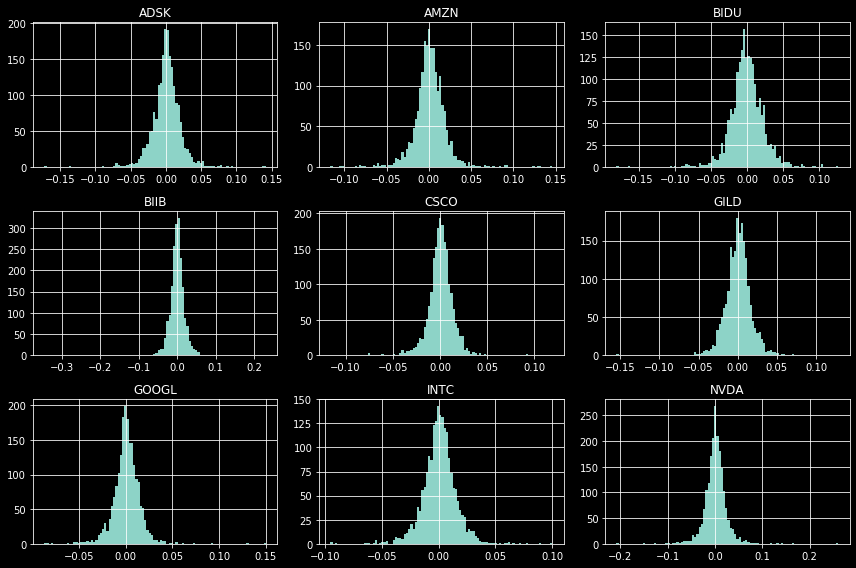

In [8]:
plt.style.use('dark_background')
returns.hist(bins=100,figsize=(12,8))
plt.tight_layout();

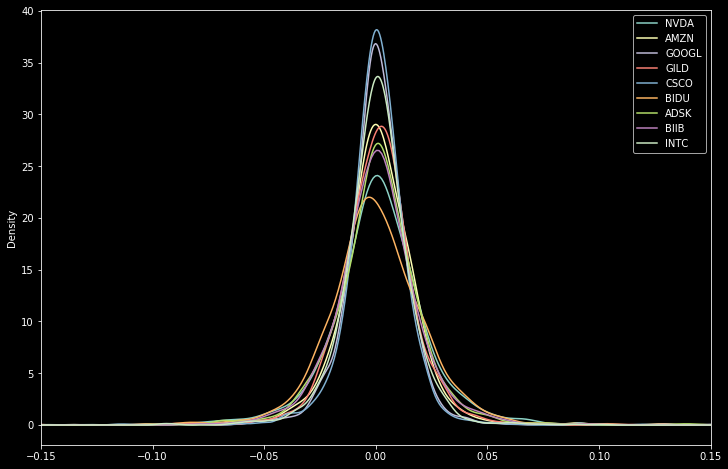

In [9]:
returns.plot(kind='kde',figsize=(12,8))
plt.xlim(xmax=0.15,xmin=-0.15);

In [10]:
weights = np.full((len(tickers)),1/len(tickers))
weights

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [11]:
returns.corr()

,NVDA,AMZN,GOOGL,GILD,CSCO,BIDU,ADSK,BIIB,INTC
NVDA,1.000000,0.364425,0.402566,0.222195,0.401844,0.321255,0.408550,0.187445,0.468292
AMZN,0.364425,1.000000,0.560276,0.268484,0.367875,0.343853,0.389428,0.226553,0.332361
GOOGL,0.402566,0.560276,1.000000,0.300247,0.389439,0.396721,0.425403,0.278682,0.378994
GILD,0.222195,0.268484,0.300247,1.000000,0.267770,0.237996,0.290944,0.446227,0.266774
CSCO,0.401844,0.367875,0.389439,0.267770,1.000000,0.284869,0.422325,0.232850,0.478762
BIDU,0.321255,0.343853,0.396721,0.237996,0.284869,1.000000,0.372664,0.211286,0.302755
ADSK,0.408550,0.389428,0.425403,0.290944,0.422325,0.372664,1.000000,0.249541,0.395104
BIIB,0.187445,0.226553,0.278682,0.446227,0.232850,0.211286,0.249541,1.000000,0.225689
INTC,0.468292,0.332361,0.378994,0.266774,0.478762,0.302755,0.395104,0.225689,1.000000


In [12]:
num_ports = 100000
all_weights = np.zeros((num_ports,len(tickers)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    weights = np.array(np.random.random(len(tickers)))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    
    #Expected return array
    ret_arr[ind] = np.sum((returns.mean()*weights)*252)
    
    #Volatily array
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    
    #Sharpe ration array
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [13]:
sharpe_arr.max()

1.162319863096207

In [14]:
max_sharpe_index = sharpe_arr.argmax()

In [23]:
all_weights[max_sharpe_index,:]

array([0.1853305 , 0.40487672, 0.08310591, 0.20555473, 0.05395154,
       0.00443481, 0.03650649, 0.01515196, 0.01108734])

In [16]:
max_sr_ret = ret_arr[max_sharpe_index]
max_sr_vol = vol_arr[max_sharpe_index]
print('Max return: %s'%max_sr_ret, 'Optimal vol: %s'%max_sr_vol)

Max return: 0.24834532670770307 Optimal vol: 0.21366349710840923


In [17]:
def print_optimal_portfolio(tickers,weights):
    print('Optimal portfolio allocation')
    for index,ticker in enumerate(tickers):
        print(ticker+': %s'%weights[index])
    print('Sum check: %s'%np.sum(weights))

In [24]:
print_optimal_portfolio(tickers,all_weights[max_sharpe_index,:])

Optimal portfolio allocation
NVDA: 0.18533049989150271
AMZN: 0.4048767168020415
GOOGL: 0.08310591241308019
GILD: 0.20555473117610795
CSCO: 0.05395153881870646
BIDU: 0.004434805845476478
ADSK: 0.03650648955508873
BIIB: 0.015151961125979257
INTC: 0.011087344372016583
Sum check: 1.0


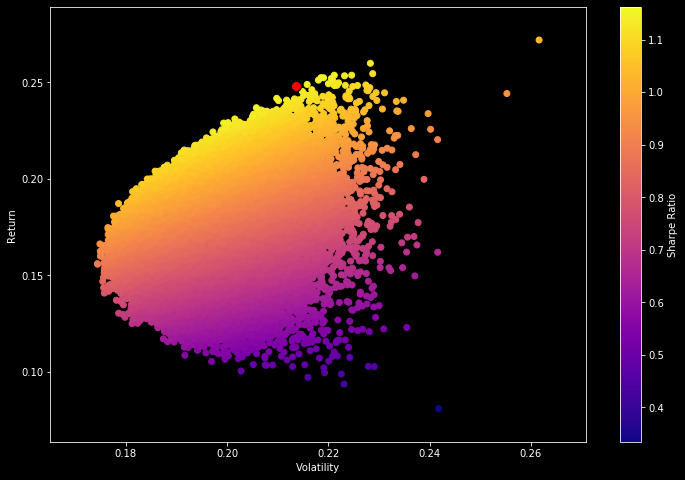

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black');

In [25]:
from scipy.optimize import minimize

In [26]:
weights = all_weights[max_sharpe_index,:]

In [27]:
weights

array([0.1853305 , 0.40487672, 0.08310591, 0.20555473, 0.05395154,
       0.00443481, 0.03650649, 0.01515196, 0.01108734])

In [28]:
def get_ret_vol_sr(weights):
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [29]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [30]:
def check_sum(weights):
    return np.sum(weights)-1

In [31]:
cons = ({'type':'eq','fun':check_sum})

In [32]:
def bounds(tickers):
    return ((0,1),)*len(tickers)

In [33]:
bounds = bounds(tickers)

In [34]:
init_guess = [0.1853305 , 0.40487672, 0.08310591, 0.20555473, 0.05395154,
       0.00443481, 0.03650649, 0.01515196, 0.01108734]

In [39]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [40]:
opt_results

     fun: -1.1872854490956366
     jac: array([-2.77161598e-04, -7.04079866e-05,  5.93423843e-04,  4.17023897e-04,
        1.20937824e-04,  8.35697651e-01,  4.16338444e-04,  1.02099106e-01,
        3.64212096e-02])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([3.11228956e-01, 4.07862922e-01, 5.74426219e-02, 1.52171929e-01,
       4.14009883e-02, 0.00000000e+00, 2.98925825e-02, 1.53550133e-17,
       1.07878116e-17])

In [41]:
optimal_weights = opt_results.x

In [49]:
print_optimal_portfolio(tickers,optimal_weights)

Optimal portfolio allocation
NVDA: 0.31122895598592265
AMZN: 0.4078629223294638
GOOGL: 0.057442621878080455
GILD: 0.15217192907526797
CSCO: 0.041400988260271665
BIDU: 0.0
ADSK: 0.0298925824709937
BIIB: 1.5355013267825957e-17
INTC: 1.0787811616230769e-17
Sum check: 1.0000000000000002


In [44]:
frontier_y = np.linspace(0,0.3,100)

In [45]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [46]:
frontier_volatility = []
for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(minimize_volatility,init_guess,method='SLSQP',\
                       bounds=bounds,constraints=cons)

    frontier_volatility.append(result['fun'])

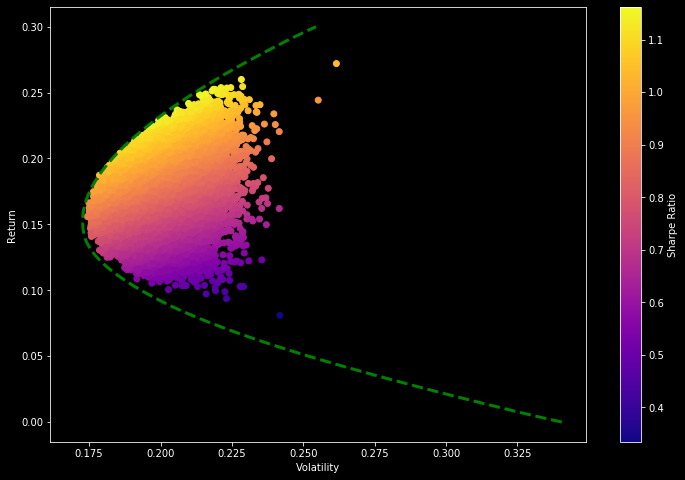

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3);